Training samples: 3709
Testing samples : 412
Compilation Time : 0.01 sec
Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.0046 - val_loss: 0.0026
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 861ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 841ms/step - loss: 0.0011 - val_loss: 6.3149e-04
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 859ms/step - loss: 7.5792e-04 - val_loss: 6.8129e-04
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - loss: 0.0011 - val_loss: 6.2433e-04
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 772ms/step - loss: 7.4415e-04 - val_loss: 6.1070e-04
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 928ms/step - loss: 8.1964e-04 - val_loss: 7.9089e-04
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 850ms/step - loss: 7.9518e-04 - val_loss: 6.3580e-04
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 883ms/step - loss: 7.6663e-04 - val_loss: 7.5160e-04
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s

Model saved as lstm_stock_model.h5


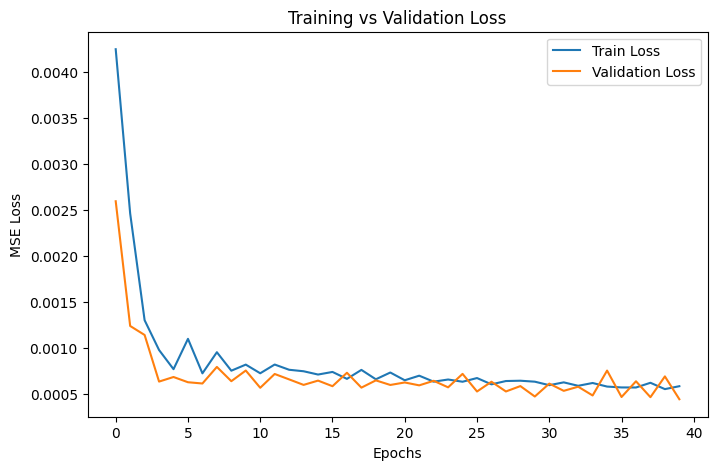

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

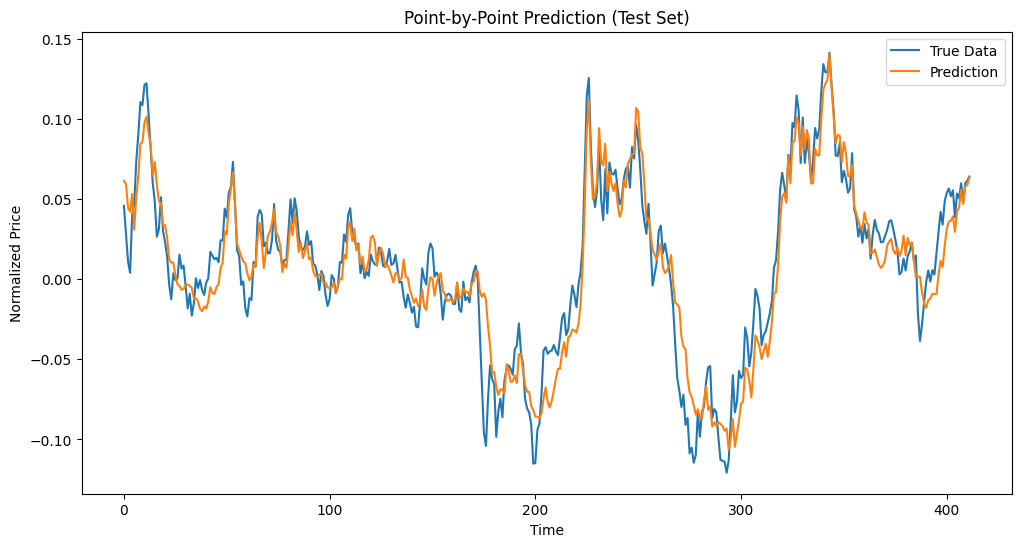

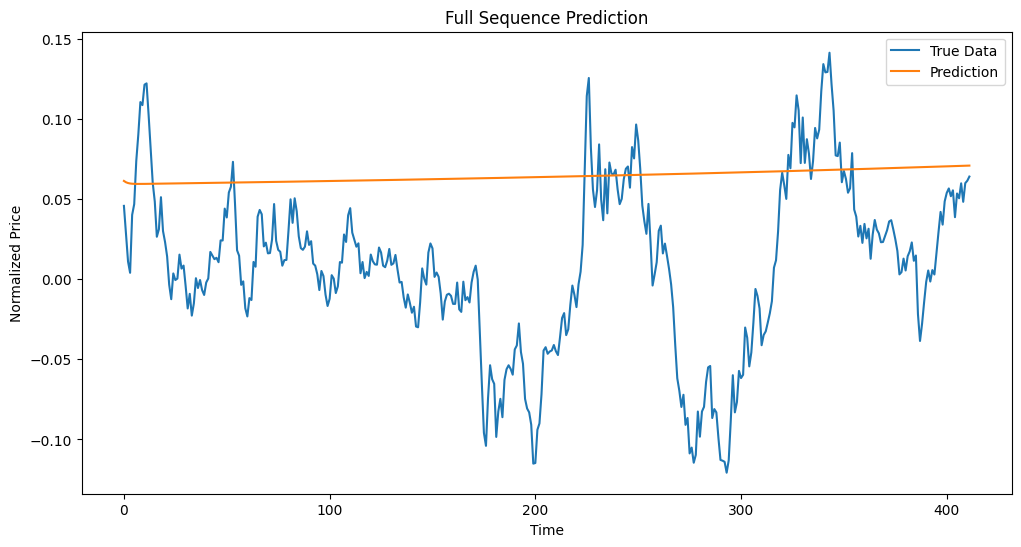

In [4]:
# Stock Price Prediction using LSTM
# ---------------------------------
# This notebook demonstrates stock price prediction using LSTM neural networks.
# Dataset: sp500.csv (closing prices)
# Custom helper functions: lstm.py (must be in same folder)

import numpy as np
import matplotlib.pyplot as plt
import lstm   # our updated lstm.py
from keras.models import load_model

# -------------------------------
# 1. Load and preprocess data
# -------------------------------
SEQ_LEN = 50   # sequence length (look-back window)
x_train, y_train, x_test, y_test = lstm.load_data("sp500.csv", seq_len=SEQ_LEN)

print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples : {x_test.shape[0]}")

# -------------------------------
# 2. Build LSTM model
# -------------------------------
model = lstm.build_model([1, 50, 100, 1])  # [input_dim, hidden1, hidden2, output]

# -------------------------------
# 3. Train the model
# -------------------------------
history = model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=40,   # combined (20 + 20) into a single training run
    validation_split=0.1,
    verbose=1
)

# ✅ Save model for reuse
model.save("lstm_stock_model.h5")
print("Model saved as lstm_stock_model.h5")

# -------------------------------
# 4. Plot training history
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# -------------------------------
# 5. Make predictions
# -------------------------------
predicted_point = lstm.predict_point_by_point(model, x_test)
predicted_seq = lstm.predict_sequence_full(model, x_test, SEQ_LEN)

# -------------------------------
# 6. Evaluate model
# -------------------------------
metrics = lstm.evaluate_model(y_test, predicted_point)

# -------------------------------
# 7. Plot results
# -------------------------------
lstm.plot_results(y_test, predicted_point, title="Point-by-Point Prediction (Test Set)")
lstm.plot_results(y_test, predicted_seq, title="Full Sequence Prediction")
